In [27]:
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

from RaceCar import RaceCar

In [37]:
action_explanation = ['do nothing', 'up', 'up+right', 'right', 'down+right', 'down', 'down+left', 'left', 'up+left']

In [28]:
env1 = RaceCar('map1.txt')

# pos X, pos Y, vel X, vel Y, action
Q1 = np.random.normal(0, 0.01, (env1.track.shape + (9, 9, 9)))-1000000
C1 = np.zeros(Q1.shape)
policy1 = np.argmax(Q1, axis=-1)

episodes = 15000
epsilon = 0.05
gamma = 1

FIRST_VISIT = False

In [29]:
for episode in tqdm(range(episodes)):

    states_actions = []
    rewards = []

    state = env1.reset()
    done = False

    steps = 0

    while not done:
        if np.random.rand() < epsilon:
            action = np.random.randint(9)
        else:
            action = policy1[state]

        while env1.is_stopped(action):
            action = np.random.randint(9)

        next_state, reward, done = env1.step(action)        

        states_actions.append((*state, action))
        rewards.append(reward)

        state = next_state
        steps += 1
    
    G = 0
    W = 1

    for i in reversed(range(len(states_actions))):
        if not FIRST_VISIT or states_actions[i] not in states_actions[:i]:
            G = gamma * G + rewards[i]
            C1[states_actions[i]] += W
            Q1[states_actions[i]] += W / C1[states_actions[i]] * (G - Q1[states_actions[i]])
            policy1 = np.argmax(Q1, axis=-1)
            if states_actions[i][4] != policy1[states_actions[i][:4]]:
                break
            W /= (1 - epsilon) + epsilon / 9

100%|█████████████████████████████████████| 15000/15000 [03:08<00:00, 79.41it/s]


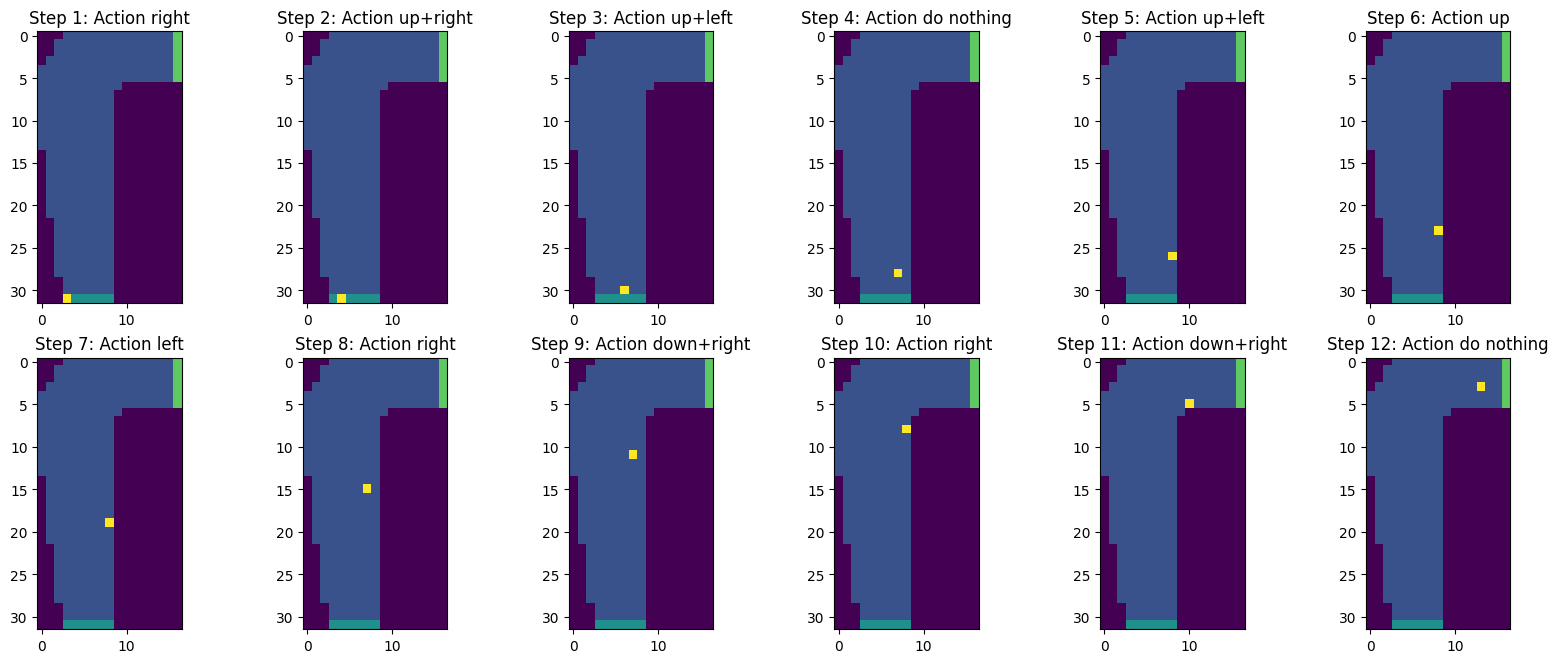

In [39]:
tracks = [] 
actions = []

state = env1.reset(0)
done = False

while not done:
    track = np.copy(env1.track)
    track[state[:2]] = 4
    tracks.append(track)
    action = policy1[state]
    actions.append(action)
    state, reward, done = env1.step(action)
    if done:
        break


steps = len(tracks)
fig, ax = plt.subplots(steps//6+1, 6, figsize=(20, 4*(steps//6+1)))

for i in range((steps//6+1)*6):
    if i < steps:
        ax[i//6][i%6].imshow(tracks[i])
        ax[i//6][i%6].set_title(f"Step {i+1}: Action {action_explanation[actions[i]]}")
    else:
        # Remove subplot
        fig.delaxes(ax[i//6][i%6])

---

In [31]:
env2 = RaceCar('map2.txt')

# pos X, pos Y, vel X, vel Y, action
Q2 = np.random.normal(0, 0.01, (env2.track.shape + (9, 9, 9)))-1000000
C2 = np.zeros(Q2.shape)
policy2 = np.argmax(Q2, axis=-1)

episodes = 20000
epsilon = 0.05
gamma = 1

FIRST_VISIT = False

In [32]:
for episode in tqdm(range(episodes)):

    states_actions = []
    rewards = []

    state = env2.reset()
    done = False

    steps = 0

    while not done:
        if np.random.rand() < epsilon:
            action = np.random.randint(9)
        else:
            action = policy2[state]

        while env2.is_stopped(action):
            action = np.random.randint(9)

        next_state, reward, done = env2.step(action)        

        states_actions.append((*state, action))
        rewards.append(reward)

        state = next_state
        steps += 1
    
    G = 0
    W = 1

    for i in reversed(range(len(states_actions))):
        if not FIRST_VISIT or states_actions[i] not in states_actions[:i]:
            G = gamma * G + rewards[i]
            C2[states_actions[i]] += W
            Q2[states_actions[i]] += W / C2[states_actions[i]] * (G - Q2[states_actions[i]])
            policy2 = np.argmax(Q2, axis=-1)
            if states_actions[i][4] != policy2[states_actions[i][:4]]:
                break
            W /= (1 - epsilon) + epsilon / 9

100%|█████████████████████████████████████| 20000/20000 [06:29<00:00, 51.30it/s]


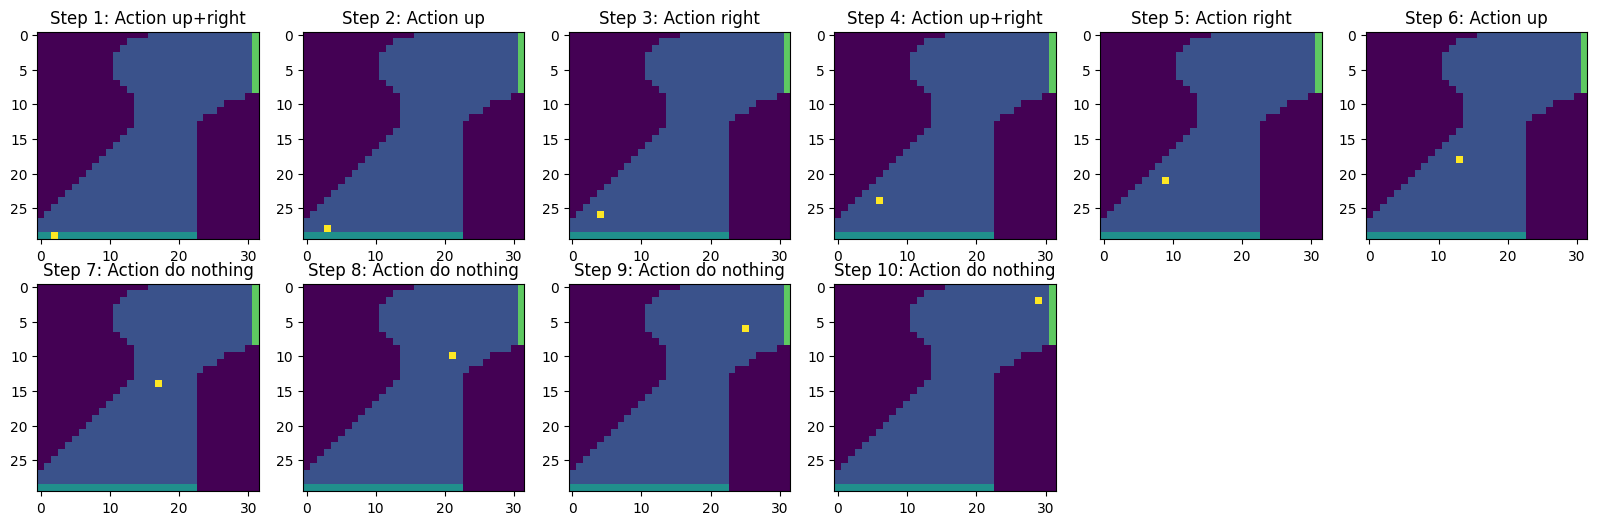

In [40]:
tracks = []
actions = []

state = env2.reset(0)
done = False

while not done:
    track = np.copy(env2.track)
    track[state[:2]] = 4
    tracks.append(track)
    action = policy2[state]
    actions.append(action)
    state, reward, done = env2.step(action)
    if done:
        break

steps = len(tracks)
fig, ax = plt.subplots(steps//6+1, 6, figsize=(20, 3*(steps//6+1)))

for i in range((steps//6+1)*6):
    if i < steps:
        ax[i//6][i%6].imshow(tracks[i])
        ax[i//6][i%6].set_title(f"Step {i+1}: Action {action_explanation[actions[i]]}")
    else:
        # Remove subplot
        fig.delaxes(ax[i//6][i%6])

plt.show()